## Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import string
from nltk import word_tokenize
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def word_count(x):
    tokens = word_tokenize(x)
    return len(tokens)

def timedelta(x):
    return (x['dev-reply-time'] - x['date']).days

In [3]:
# Load the dataset, select attibutes, remove non-english reviews
data = pd.read_csv("C:\\Users\\ASUS\\Desktop\\directed research\\data.csv")
data = data.loc[data['english'] == '0', ['date', 'rating', 'reviewText', 'dev-reply-time', 'SoftwareQ', 'FQ']]

# Transform the review dates and reply dates to caculate them easy
data['date'] = pd.to_datetime(data['date'])
data['dev-reply-time'] = pd.to_datetime(data['dev-reply-time'])

# Caculate the week, review length and response time
data['week'] = data['date'].dt.dayofweek
data['Review length'] =  data.apply(lambda x: word_count(x['reviewText']), axis = 1)
data['timedelta'] =  data.apply(timedelta, axis = 1)

## Statistics Analysis

In [4]:
sns.set(font_scale = 1.3)
# The distribution of the quantitative attributes
data.describe()

,rating,week,Review length,timedelta
count,2035.000000,2035.000000,2035.000000,321.000000
mean,2.986732,2.970025,48.579853,-5.218069
std,1.413977,1.974415,49.502360,57.282762
min,1.000000,0.000000,1.000000,-613.000000
25%,2.000000,1.000000,17.000000,1.000000
50%,3.000000,3.000000,34.000000,1.000000
75%,4.000000,5.000000,63.000000,4.000000
max,5.000000,6.000000,674.000000,120.000000


### Review Length vs Response Rate

In [5]:
def length_group(x):
    temp = sub[(sub['Review length'] > L[x.name]) & (sub['Review length'] < L[x.name+1])].count()
    return (temp['dev-reply-time'] / temp['Review length']) * 100

In [6]:
L = [0, 10, 20, 50, 100, 200, 1000]
sub = data[['Review length', 'dev-reply-time']]
df = pd.DataFrame({'Review length': ['0~10','11~20','21~50','51~100', '101~200', '200+']})
df['Response rate(%)'] = df.apply(length_group, axis=1)
df

,Review length,Response rate(%)
0,0~10,5.468750
1,11~20,14.920635
2,21~50,16.961652
3,51~100,18.448637
4,101~200,19.371728
5,200+,31.250000


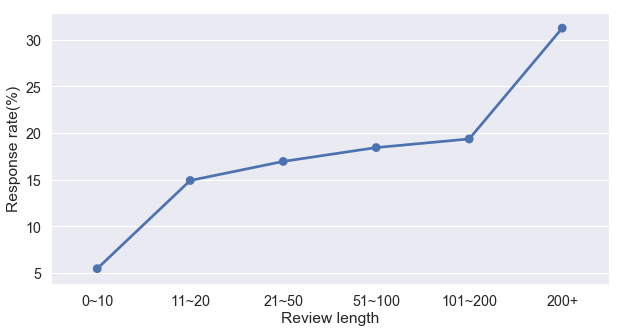

In [7]:
plt.figure(figsize=(10, 5))
sns.pointplot(x = 'Review length', y = 'Response rate(%)',data = df)

###  Review Length vs  Mean Response Time

In [8]:
# Caculate the mean response time of all the replied reviews, negative response times are removed as wrong data
def length_mean(x):
    return sub[(sub['Review length'] > L[x.name]) & (sub['Review length'] < L[x.name+1]) & (sub.timedelta > 0)].timedelta.mean()

In [9]:
sub = data[['Review length', 'timedelta']]
df = pd.DataFrame({'Review length': ['0~10','11~20','21~50','51~100', '101~200', '200+']})
df[' Mean Response Time(days)'] = df.apply(length_mean, axis=1)
df

,Review length,Mean Response Time(days)
0,0~10,2.111111
1,11~20,3.534884
2,21~50,4.797753
3,51~100,2.891892
4,101~200,10.545455
5,200+,5.222222


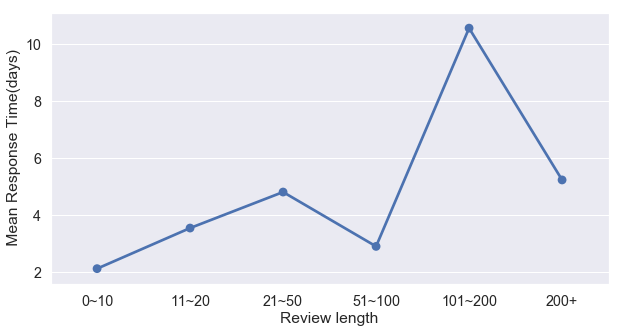

In [10]:
plt.figure(figsize=(10, 5))
sns.pointplot(x = 'Review length', y = ' Mean Response Time(days)',data = df)

### Week vs Response Rate

In [11]:
def week_group(x):
    temp = sub[sub.week == x.name].count()
    return (temp['dev-reply-time'] / temp['week']) * 100

In [12]:
W = ['Monday', 'Tuesday', 'Wendnesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sub = data[['week', 'dev-reply-time']]
df = pd.DataFrame({'Week': W})
df['Response rate(%)'] = df.apply(week_group, axis=1)
df

,Week,Response rate(%)
0,Monday,13.993174
1,Tuesday,16.040956
2,Wendnesday,22.500000
3,Thursday,14.429530
4,Friday,14.814815
5,Saturday,14.590747
6,Sunday,14.285714


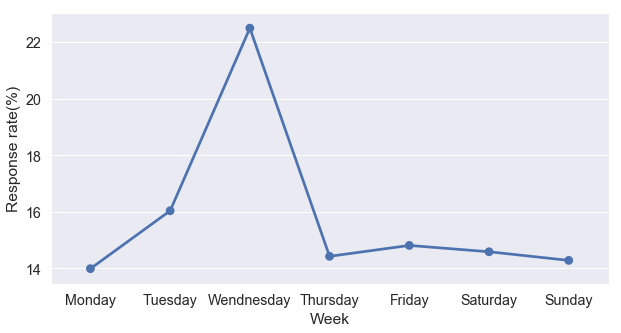

In [13]:
plt.figure(figsize=(10, 5))
sns.pointplot(x = 'Week', y = 'Response rate(%)',data = df)

### Week vs Mean Response Time

In [14]:
def week_mean(x):
    return sub[(sub.timedelta > 0) & (sub.week == x.name)]['timedelta'].mean()

In [15]:
sub = data[['week', 'timedelta']]
df = pd.DataFrame({'Week': W})
df['Mean Response Time(days)'] = df.apply(week_mean, axis=1)
df

,Week,Mean Response Time(days)
0,Monday,6.352941
1,Tuesday,5.555556
2,Wendnesday,6.566038
3,Thursday,4.171429
4,Friday,3.722222
5,Saturday,3.055556
6,Sunday,2.147059


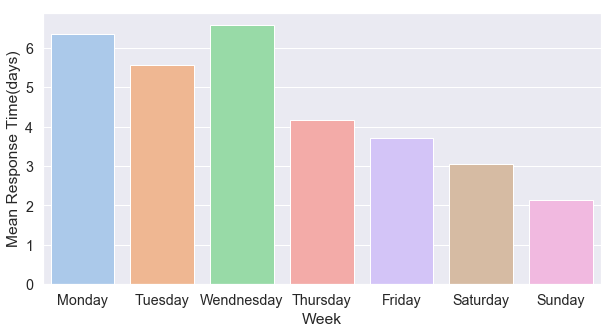

In [16]:
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = df.Week, y = df['Mean Response Time(days)'], palette =  'pastel')

### Rating vs Response Rate

In [17]:
def rating_group(x):
    temp = sub[sub.rating == R[x.name]].count()
    return (temp['dev-reply-time'] / temp['rating']) * 100

In [18]:
R = [1, 2, 3, 4, 5]
sub = data[['rating', 'dev-reply-time']]
df = pd.DataFrame({'Rating': ['1','2','3','4','5']})
df['Response rate(%)'] = df.apply(rating_group, axis=1)
df

,Rating,Response rate(%)
0,1,23.970944
1,2,23.774510
2,3,18.427518
3,4,6.633907
4,5,5.750000


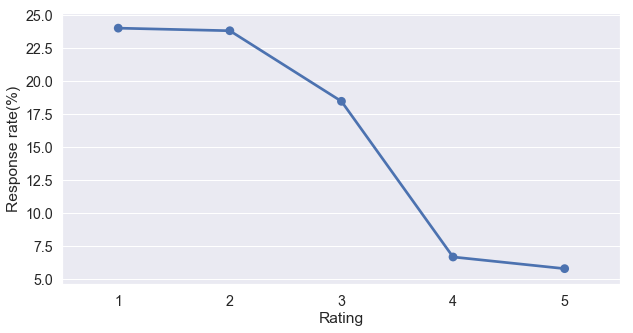

In [19]:
plt.figure(figsize=(10, 5))
sns.pointplot(x = 'Rating', y = 'Response rate(%)',data = df)

### Rating vs Mean Response Time

In [20]:
def rating_mean(x):
    return sub[(sub.timedelta > 0) & (sub.rating == R[x.name])].timedelta.mean()

In [21]:
sub = data[['rating', 'timedelta']]
df = pd.DataFrame({'Rating': ['1','2','3','4','5']})
df['Mean Response Time(days)'] = df.apply(rating_mean, axis=1)
df

,Rating,Mean Response Time(days)
0,1,3.540541
1,2,4.409639
2,3,6.626866
3,4,4.409091
4,5,3.222222


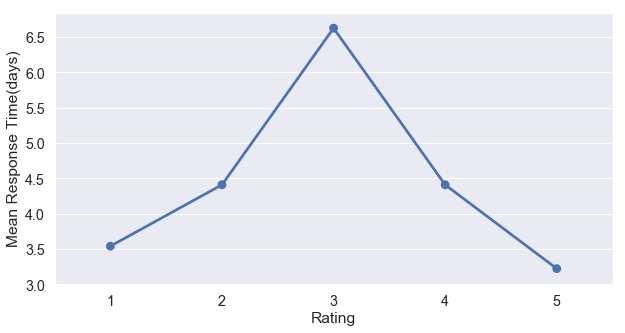

In [22]:
plt.figure(figsize=(10, 5))
sns.pointplot(x = 'Rating', y = 'Mean Response Time(days)',data = df)

### Category vs Response Rate

In [23]:
def category_group(x):
    temp = sub[sub.FQ.str.contains(x.Category) | sub.SoftwareQ.str.contains(x.Category)].count()
    return [temp['FQ'], temp['dev-reply-time'], (temp['dev-reply-time']/temp['FQ'])*100]

In [24]:
sub = data[['SoftwareQ', 'FQ', 'dev-reply-time']]
df = pd.DataFrame({'Category': ['complaint','functerr','featureRequest','featureRemoval', 'usability', 'reliability', 'content', 'pricing']})
df['Total'], df['Replied'], df['Response rate(%)']= zip(*df.apply(category_group, axis=1))
df

,Category,Total,Replied,Response rate(%)
0,complaint,1446,274,18.948824
1,functerr,475,111,23.368421
2,featureRequest,355,48,13.521127
3,featureRemoval,70,11,15.714286
4,usability,346,39,11.271676
5,reliability,121,29,23.966942
6,content,386,37,9.585492
7,pricing,136,33,24.264706


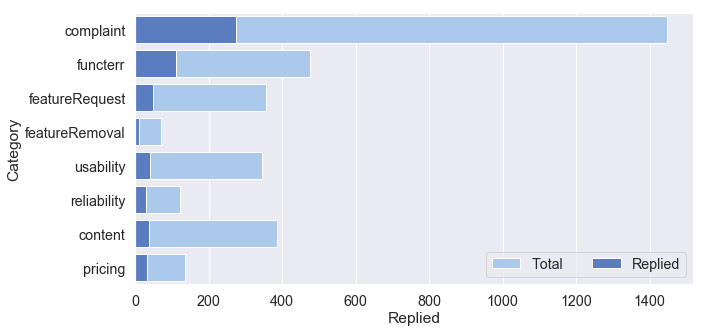

In [25]:
f, ax = plt.subplots(figsize=(10, 5))

sns.set_color_codes('pastel')
sns.barplot(x='Total', y='Category', data=df, label='Total', color='b')
sns.set_color_codes('muted')
sns.barplot(x='Replied', y='Category', data=df, label='Replied', color='b')

ax.legend(ncol=2, loc='lower right', frameon=True)

### Category vs Mean Response Time

In [26]:
def category_mean(x):
    return sub[(sub.FQ.str.contains(x.Category) | sub.SoftwareQ.str.contains(x.Category)) & (sub.timedelta > 0)].timedelta.mean()

In [27]:
sub = data[['SoftwareQ', 'FQ', 'timedelta']]
df = pd.DataFrame({'Category': ['complaint','functerr','featureRequest','featureRemoval', 'usability', 'reliability', 'content', 'pricing']})
df['Mean Response Time(days)'] = df.apply(category_mean, axis=1)
df

,Category,Mean Response Time(days)
0,complaint,4.411504
1,functerr,4.413793
2,featureRequest,5.391304
3,featureRemoval,4.111111
4,usability,3.970588
5,reliability,3.409091
6,content,3.125000
7,pricing,1.884615


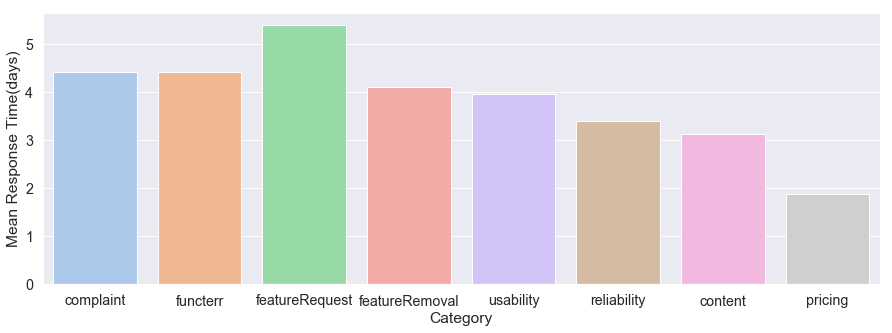

In [28]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x = df.Category, y = df['Mean Response Time(days)'], palette =  'pastel')